## Step 1
Reading MTA turnstile data and creating dictionary

In [6]:
import pandas as pd
import datetime
import pprint

In [7]:
mta = pd.read_csv("turnstile_160109.txt")

## Shorten data to 5000 rows for quicker testing
mta = mta.head(5000)

#print(mta.head(10))

In [8]:
## Create key and initiate dictionary
mta['key'] = zip(mta['C/A'], mta['UNIT'], mta['SCP'], mta['STATION'])

#pprint.pprint(mta)
mta_dict = {}

In [9]:
## Loop each row in mta list and add its key and value into dictionary mta_dict
for index, row in mta.iterrows():
    value = row[4:11].tolist()
    key = row['key']
    #print key, value
    
    if key in mta_dict:
        mta_dict[key].append(value)
        
    else:
        mta_dict[key] = [value]
        
#pprint.pprint(mta_dict, width=100)

## Step 2 
Create datetime series in dictionary

In [10]:
## Create new datetime column
mta['datetime'] = pd.to_datetime(mta.DATE + mta.TIME, format='%m/%d/%Y%H:%M:%S')
#mta

In [11]:
datetime_dict = {}

## Loop through each....
for index, row in mta.iterrows():
    value = row['datetime'], row['ENTRIES']
    key = row['key']
    #print key, value
    
    if key in datetime_dict:
        datetime_dict[key].append(value)
        
    else:
        datetime_dict[key] = [value]
        
#pprint.pprint(datetime_dict)

## Step 3 
Count daily entries

In [12]:
## count_day function takes a list of DateTime objects with the turnstile counter and calculates each day's entries
## and returns a list of [(date, count)]

def count_day(my_list):
    ## Get unique values of dates
    dates = [row[0].date() for row in my_list]
    dates = set(dates)
    #print dates
    
    result = []
    for date in dates:
        
        tomorrows_date = date + datetime.timedelta(days=1)
        
        todays_entries = [x[1] for x in my_list if x[0].date() == date]
        
        if tomorrows_date in dates:
            tomorrows_entries = [x[1] for x in my_list if x[0].date() == tomorrows_date]
            result.append((date, min(tomorrows_entries)-min(todays_entries)))
        else:
            result.append((date, max(todays_entries)-min(todays_entries)))
        
        
        #print tomorrows_entries
        
        #print nextdays_entries
        #result.append((date, max(entries)-min(entries)))
    
    #print result
    return result
    
    
    
#pprint.pprint(count_day(datetime_dict[('A002', 'R051', '02-00-00', '59 ST')]))


In [13]:
count_dict = {key:count_day(datetime_dict[key]) for key in datetime_dict}
#pprint.pprint(count_dict, width = 100)

## Part 4
Plotting 1 turnstile at a time

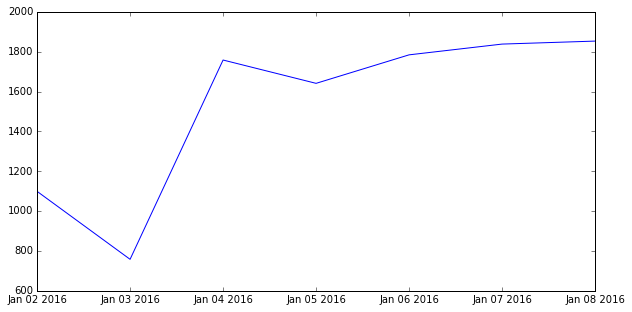

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

## This function takes a dictionary and the turnstile's unique key and plots a simple time series plot
def plot_turnstile(dictionary, turnstile_key):
    turnstile_data = sorted(dictionary[turnstile_key])
    
    dates = [x[0] for x in turnstile_data]
    counts = [x[1] for x in turnstile_data]

    plt.figure(figsize=(10,5))
    plt.plot(dates, counts)
    
# Demonstrating one example
plot_turnstile(count_dict, ('A002', 'R051', '02-00-00', '59 ST'))



## Part 5
Combining all turnstiles for a station

In [55]:
## Using station ('A002', 'R051', '02-00-00', '59 ST')

## Get individual station key
station_key = ('A002', 'R051')

## Get a list of all dictionary keys from dictionary
all_keys = [key for key in count_dict]

## Match keys that I want
foo = [key for key in all_keys if (key[:2] == station_key)]
#print foo

#print all_keys[0][:2] == ('A007', 'R079')

## Get all the entries from the keys
station_list = [count_dict[key] for key in foo]
#pprint.pprint(station_dict)

## sum them up
d = {}
for turnstile in station_list:
    for day in turnstile:
        key = day[0]
        value = day[1]
        
        if key not in d:
            d[key] = value
        else:
            d[key] += value
            
pprint.pprint(d)   

#### Need easier way to do this. sum a list of entries conditioned on the date that i want??? #####

{datetime.date(2016, 1, 2): 10830,
 datetime.date(2016, 1, 3): 7982,
 datetime.date(2016, 1, 4): 17156,
 datetime.date(2016, 1, 5): 16463,
 datetime.date(2016, 1, 6): 17865,
 datetime.date(2016, 1, 7): 17924,
 datetime.date(2016, 1, 8): 17447}


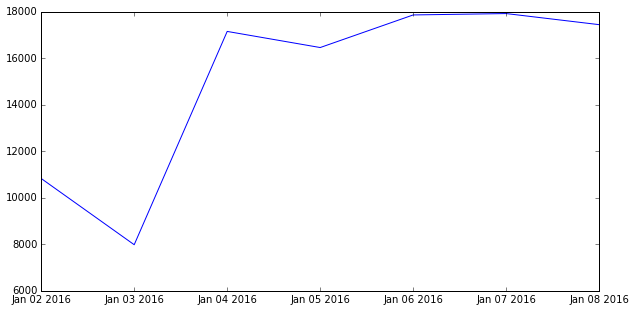

In [61]:
dates = [x for x in sorted(d)]
counts = [d[y] for y in sorted(d)]

plt.figure(figsize=(10,5))
plt.plot(dates, counts)